In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
os.getcwd()

'/Users/kouryl/SJSU/cs163/notebooks'

In [2]:
data_folder = '../data/'
evdata = data_folder+'evwatts.public/'

In [3]:
df = pd.read_excel(data_folder + 'HS861 2010-.xlsx', header=2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                728 non-null    int64  
 1   STATE               728 non-null    object 
 2   Thousand Dollars    728 non-null    int64  
 3   Megawatthours       728 non-null    int64  
 4   Count               728 non-null    int64  
 5   Cents/kWh           728 non-null    float64
 6   Thousand Dollars.1  728 non-null    int64  
 7   Megawatthours.1     728 non-null    int64  
 8   Count.1             728 non-null    int64  
 9   Cents/kWh.1         728 non-null    float64
 10  Thousand Dollars.2  728 non-null    int64  
 11  Megawatthours.2     728 non-null    int64  
 12  Count.2             728 non-null    int64  
 13  Cents/kWh.2         728 non-null    float64
 14  Thousand Dollars.3  728 non-null    int64  
 15  Megawatthours.3     728 non-null    int64  
 16  Count.3 

<Axes: xlabel='Year', ylabel='Megawatthours.4'>

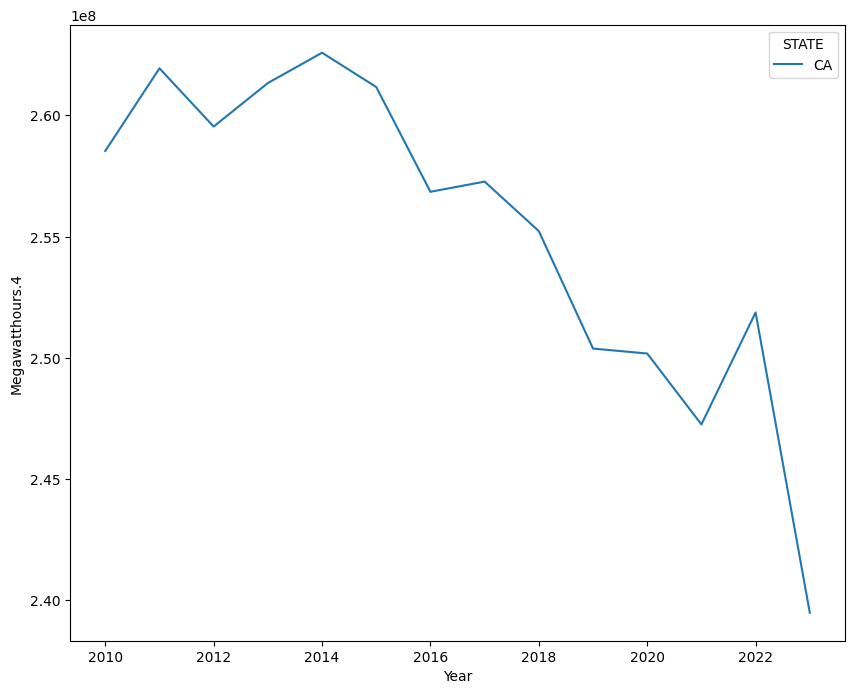

In [4]:
df = pd.read_excel(data_folder+"HS861 2010-.xlsx", header=2)
df = df[['Year', 'STATE', 'Thousand Dollars.4', 'Megawatthours.4', 'Cents/kWh.4']]
#df = df[df['STATE'].isin(['CA', 'WA', 'NY', 'TX'])]
df = df[df['STATE'].isin(['CA'])]
#df['Megawatthours.4'] = df['Megawatthours.4'].str.replace(",",'')
df['Megawatthours.4'] = pd.to_numeric(df['Megawatthours.4'], errors='coerce')
usage = df
usage

fig = plt.figure(figsize=(10, 8))
sns.lineplot(x=usage['Year'],
             y=usage['Megawatthours.4'],
             hue=usage['STATE'],

             )

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for {A44787D4-0540-4523-9961-78E4036D8C6D}
  warn(f"Unknown type for {prop.name}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62282 entries, 0 to 62281
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        62282 non-null  int64  
 1   STATE                       62282 non-null  object 
 2   TYPE OF PRODUCER            62282 non-null  object 
 3   ENERGY SOURCE               62282 non-null  object 
 4   GENERATION (Megawatthours)  62282 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


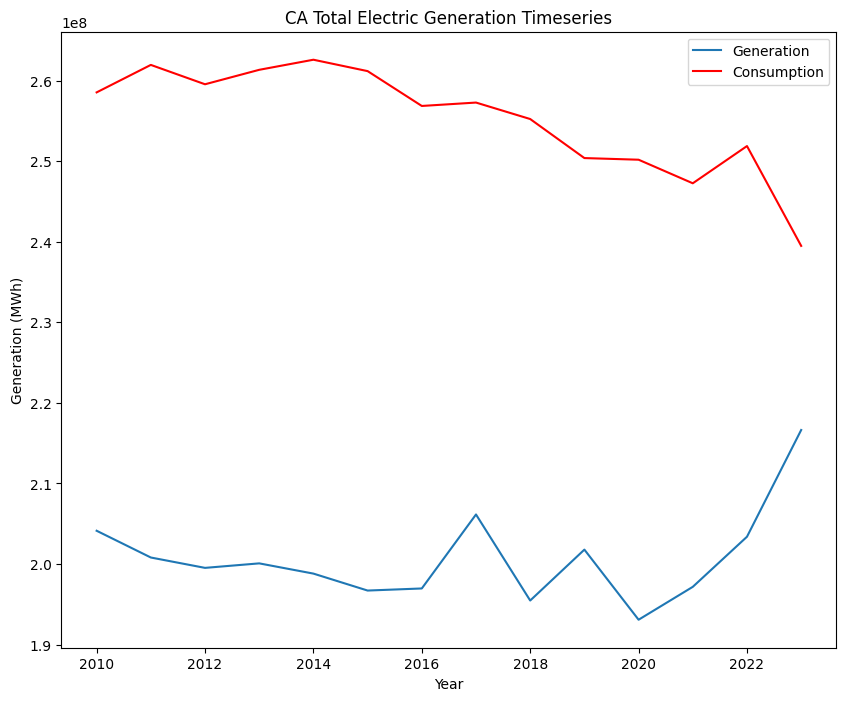

In [5]:
df = pd.read_excel(data_folder + "annual_generation_state.xlsx", header=1)
df.info()
df
test = df[(df['STATE'] == 'CA') & (df['ENERGY SOURCE'] == 'Total') & (df['YEAR'] >= 2010) & (df['TYPE OF PRODUCER'] == 'Total Electric Power Industry')]
#test = test.groupby(['YEAR'])['GENERATION (Megawatthours)'].sum().reset_index()
test
fig = plt.figure(figsize=(10, 8))
plt.plot(test['YEAR'], test['GENERATION (Megawatthours)'], label='Generation')
plt.plot(usage['Year'], usage['Megawatthours.4'], color='red', label='Consumption')
plt.title('CA Total Electric Generation Timeseries')
plt.xlabel('Year')
plt.ylabel('Generation (MWh)')
plt.legend()

In [6]:
ev_data = pd.read_csv(evdata + "evwatts.public.vehiclesessions.csv")
ev_data

,id,vehicle_id,start_datetime,stop_datetime,duration,energy_kwh,soc_start,soc_stop,rucc_id,flag_id
0,19904,702,2021-03-09,NaN,1.956111,12.720231,90.0,90.0,1.0,0
1,19905,703,2021-03-09,NaN,6.950833,169.101094,55.0,90.0,1.0,0
2,19906,697,2021-03-09,NaN,3.346111,150.250031,60.0,90.0,1.0,16
3,19907,699,2021-03-09,NaN,0.433333,24.737317,85.0,90.0,1.0,16
4,19908,700,2021-03-09,NaN,2.033056,96.214313,30.0,50.0,1.0,16
...,...,...,...,...,...,...,...,...,...,...
182866,695138,291,2023-10-31 07:50:00,2023-10-31 08:00:00,0.138889,0.679000,0.0,5.0,1.0,512
182867,695139,949,2023-10-12 07:00:00,2023-10-12 08:30:00,1.547778,1.656000,90.0,100.0,1.0,0
182868,695140,949,2023-11-14 14:20:00,2023-11-14 14:30:00,0.192778,0.643770,0.0,5.0,5.0,512
182869,695141,949,2023-11-22 14:00:00,2023-11-22 14:10:00,0.112778,0.552000,NaN,NaN,1.0,512


In [7]:
ev_data['charge_year'] = pd.to_numeric(ev_data['start_datetime'].str[:4])
ev_data

,id,vehicle_id,start_datetime,stop_datetime,duration,energy_kwh,soc_start,soc_stop,rucc_id,flag_id,charge_year
0,19904,702,2021-03-09,NaN,1.956111,12.720231,90.0,90.0,1.0,0,2021
1,19905,703,2021-03-09,NaN,6.950833,169.101094,55.0,90.0,1.0,0,2021
2,19906,697,2021-03-09,NaN,3.346111,150.250031,60.0,90.0,1.0,16,2021
3,19907,699,2021-03-09,NaN,0.433333,24.737317,85.0,90.0,1.0,16,2021
4,19908,700,2021-03-09,NaN,2.033056,96.214313,30.0,50.0,1.0,16,2021
...,...,...,...,...,...,...,...,...,...,...,...
182866,695138,291,2023-10-31 07:50:00,2023-10-31 08:00:00,0.138889,0.679000,0.0,5.0,1.0,512,2023
182867,695139,949,2023-10-12 07:00:00,2023-10-12 08:30:00,1.547778,1.656000,90.0,100.0,1.0,0,2023
182868,695140,949,2023-11-14 14:20:00,2023-11-14 14:30:00,0.192778,0.643770,0.0,5.0,5.0,512,2023
182869,695141,949,2023-11-22 14:00:00,2023-11-22 14:10:00,0.112778,0.552000,NaN,NaN,1.0,512,2023


In [8]:
vehicle_data = pd.read_csv(evdata + 'evwatts.public.vehicles.csv')
vehicle_data
id_to_state = dict(zip(vehicle_data['id'], vehicle_data['state']))

ev_data['state'] = ev_data['vehicle_id'].map(id_to_state)
ev_data

,id,vehicle_id,start_datetime,stop_datetime,duration,energy_kwh,soc_start,soc_stop,rucc_id,flag_id,charge_year,state
0,19904,702,2021-03-09,NaN,1.956111,12.720231,90.0,90.0,1.0,0,2021,California
1,19905,703,2021-03-09,NaN,6.950833,169.101094,55.0,90.0,1.0,0,2021,California
2,19906,697,2021-03-09,NaN,3.346111,150.250031,60.0,90.0,1.0,16,2021,California
3,19907,699,2021-03-09,NaN,0.433333,24.737317,85.0,90.0,1.0,16,2021,California
4,19908,700,2021-03-09,NaN,2.033056,96.214313,30.0,50.0,1.0,16,2021,California
...,...,...,...,...,...,...,...,...,...,...,...,...
182866,695138,291,2023-10-31 07:50:00,2023-10-31 08:00:00,0.138889,0.679000,0.0,5.0,1.0,512,2023,Colorado
182867,695139,949,2023-10-12 07:00:00,2023-10-12 08:30:00,1.547778,1.656000,90.0,100.0,1.0,0,2023,Colorado
182868,695140,949,2023-11-14 14:20:00,2023-11-14 14:30:00,0.192778,0.643770,0.0,5.0,5.0,512,2023,Colorado
182869,695141,949,2023-11-22 14:00:00,2023-11-22 14:10:00,0.112778,0.552000,NaN,NaN,1.0,512,2023,Colorado


In [9]:
grouped_ev_data = ev_data.groupby(['charge_year', 'state'])['energy_kwh'].sum().reset_index()
grouped_ev_data['energy_mwh'] = grouped_ev_data['energy_kwh'] / 1000

In [10]:
ca_grouped_data = grouped_ev_data[grouped_ev_data['state'] == 'California'].reset_index()
ca_grouped_data

,index,charge_year,state,energy_kwh,energy_mwh
0,0,2019,California,1.560513e+05,156.051291
1,2,2020,California,8.063908e+05,806.390827
2,7,2021,California,9.461077e+05,946.107665
3,16,2022,California,1.545195e+06,1545.195026
4,25,2023,California,1.153831e+06,1153.831161


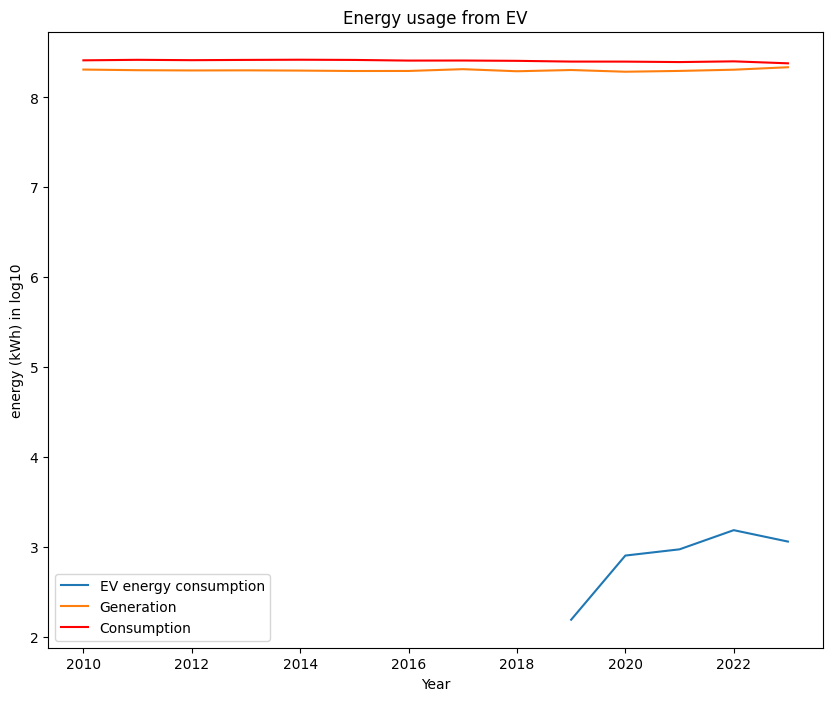

In [43]:
ca_grouped_data = grouped_ev_data[grouped_ev_data['state'] == 'California']
fig = plt.figure(figsize=(10,8))
sns.lineplot(x=ca_grouped_data['charge_year'],
             y=np.log10(ca_grouped_data['energy_mwh']),
             label='EV energy consumption'
            )
plt.plot(test['YEAR'], np.log10(test['GENERATION (Megawatthours)']), label='Generation')
plt.plot(usage['Year'], np.log10(usage['Megawatthours.4']), color='red', label='Consumption')

plt.title("Energy usage from EV")
plt.xlabel("Year")
plt.ylabel("energy (kWh) in log10")
plt.legend()

In [41]:
ev_data['energy_mwh'] = ev_data['energy_kwh'] / 1000
ev_data.groupby(['state', 'charge_year'])['energy_mwh'].sum().reset_index().sort_values(by=['state','energy_mwh'], ascending=False)

,state,charge_year,energy_mwh
33,Washington,2023,55.127498
32,Washington,2022,32.926928
31,Washington,2021,23.247871
29,Texas,2022,245.215983
30,Texas,2023,78.855002
28,Texas,2021,9.236334
26,Other,2022,58.538379
27,Other,2023,53.905577
25,Other,2021,18.719135
24,Other,2020,0.645760
